Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 2.1) 나무위키 최신 변경 문서의 키워드 분석

### 바로가기

- [<Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기](#<Step1.-크롤링>-:-크롤링으로-웹-데이터-가져오기)
    - [BeautifulSoup을 이용한 웹 크롤링]
    - [나무위키 최근변경 데이터 크롤링]
- [<Step2. 추출> : 키워드 추출](#<Step2.-추출>-:-키워드-추출)
    - [텍스트 데이터 전처리]
    - [말뭉치 만들기]
    - [konlpy를 이용한 키워드 추출]
    - [키워드 가다듬기]
- [<Step3. 시각화> : 워드 클라우드 시각화](#<Step3.-시각화>-:-워드-클라우드-시각화)
    - [pytagcloud 사용하기]
    - [나무위키 키워드 시각화]

-----

In [ ]:
맥 OS, 리눅스 OS의 경우 /Users/yoonk/anaconda3/envs/pybook/lib/python3.7/site-packages/ pytagcloud/fonts의 경로에 위와 동일한 방법을 적용해줍니다.

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기

### [BeautifulSoup을 이용한 웹 크롤링]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install selenium`
    - (env_name) `pip install beautifulsoup4`
- 혹은 아래의 코드로 라이브러리를 설치합니다.

In [2]:
!pip install selenium beautifulsoup4

-----

##### 페이지 리스트 가져오기

In [3]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re

# brew 로 설치된 chromedriver의 path (Mac)
path = "/usr/local/bin/chromedriver"

# 윈도우용 크롬 웹드라이버 실행 경로 (Windows)
excutable_path = "chromedriver.exe"

# 크롤링할 사이트 주소를 정의합니다.
source_url = "https://namu.wiki/RecentChanges"

# 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
# driver = webdriver.Chrome(path)  # for Mac
driver = webdriver.Chrome(executable_path=excutable_path)  # for Windows
driver.get(source_url)
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")
contents_table = soup.find(name="table")
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

In [4]:
# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all("td")[0]
    td_url = first_td.find_all("a")
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get("href")
        if "png" not in page_url:
            page_urls.append(page_url)

# 중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

https://namu.wiki/w/%ED%8B%80:%EB%A6%AC%EB%B2%84%ED%92%80%20FC
https://namu.wiki/w/%EC%83%B9%EB%8D%B8%EB%9D%BC
https://namu.wiki/w/%EB%82%98%EB%9D%BD%EC%9D%98%20%ED%95%A8%EC%A0%95%20%EC%86%8D%EC%9C%BC%EB%A1%9C
https://namu.wiki/w/Skul:%20The%20Hero%20Slayer/%EC%8A%A4%EC%BB%AC
https://namu.wiki/w/%EB%A0%88%EB%93%9C%EC%82%AD%EC%8A%A4


-----

##### 페이지내 텍스트 구조 확인

In [5]:
# driver = webdriver.Chrome(path)  # for Mac
driver = webdriver.Chrome(executable_path=excutable_path)  # for Windows
driver.get(page_urls[0])
req = driver.page_source
soup = BeautifulSoup(req, 'html.parser')
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

틀:리버풀 FC 


잉글랜드의 축구클럽(틀)리버풀 FC


리버풀 FC 2021-22 시즌 스쿼드 [ 펼치기 · 접기 ]리버풀 FC 2021-22 시즌 스쿼드134(3C)67(VC)알리송 베케르Alisson Becker | GK1992.10.02.2018~2024파비뉴Fábinho | MF1993.10.23.2018~2023버질 판데이크Virgil van Dijk | DF1991.07.08.2018~2023티아고 알칸타라Thiago Alcântara | MF1991.04.11.2020~2024제임스 밀너James Milner | MF1986.01.04.2015~202289101112나비 케이타Naby Keïta | MF1995.02.10.2018~2023호베르투 피르미누Roberto Firmino | FW1991.10.02.2015~2023사디오 마네Sadio Mané | FW1992.04.10.2016~2023모하메드 살라Mohamed Salah | FW1992.06.15.2017~2023조 고메즈Joe Gomez | DF1997.05.23.2015~20241314(C)151719아드리안 산미겔Adrián San Miguel | GK1987.01.03.2019~2023조던 헨더슨Jordan Henderson | MF1990.06.17.2011~2023알렉스 옥슬레이드체임벌린Alex Oxlade-Chamberlain | MF1993.08.15.2017~2022커티스 존스Curtis Jones | MF2001.01.30.2018~2023오잔 카바크Ozan Kabak | DF2000.03.25.2021[A]2021232627디오구 조타Diogo Jota | FW1996.12.04.2020~2025콘스탄티노스 치미카스Konstantinos Tsimikas | DF1996.05.12.2020~2025제르단 샤키리Xherdan Shaqiri | MF1991.10.10.2018~2023앤디 로버트슨Andy Robertson | DF1994.03.11.2017~2024디

-----

### [나무위키 최근변경 데이터 크롤링]

In [6]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비합니다.
columns = ["title", "category", "content_text"]
df = pd.DataFrame(columns=columns)

# 각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls:

    # 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    # driver = webdriver.Chrome(path)  # for Mac
    driver = webdriver.Chrome(executable_path=excutable_path)  # for Windows
    driver.get(page_url)
    req = driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    contents_table = soup.find(name="article")
    title = contents_table.find_all("h1")[0]
    
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all("ul")) > 0:
        category = contents_table.find_all("ul")[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
    content_corpus_list = []
    
    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
        
    # 페이지 내 카테고리정보에서 “분류”라는 단어와 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
    
    # 모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)
    
    # 크롤링에 사용한 브라우저를 종료합니다.
    driver.close()

In [10]:
# 데이터 프레임을 출력합니다.
df.head(5)

title                      category  \
0                  틀:리버풀 FC            잉글랜드의 축구클럽(틀)리버풀 FC   
1                       샹델라       5세대 포켓몬고스트타입 포켓몬불꽃타입 포켓몬   
2                나락의 함정 속으로                  유희왕/OCG/일반 함정   
3  Skul: The Hero Slayer/스컬   Skul: The Hero Slayer게임 내 정보   
4                      레드삭스    대한민국의 걸그룹해체된 아이돌 그룹2005년 데뷔   

                                        content_text  
0  리버풀 FC 2021-22 시즌 스쿼드 [ 펼치기 · 접기 ]리버풀 FC 2021-...  
1  포켓몬 도감 나열 순서 606 벰크 607 불켜미 608 램프라 609 샹델라 61...  
2  유희왕/OCG의 일반 함정 카드.   관련 문서: 함정 속으로(유희왕/카드군), ,...  
3     상위 문서: Skul: The Hero Slayer스컬아이템과 각인정수스테이지...  
4     은(는) 여기로 연결됩니다. 야구팀에 대한 내용은 보스턴 레드삭스 문서를의 번...

-----

# <Step2. 추출> : 키워드 추출

### [텍스트 데이터 전처리]

In [11]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [12]:
print(text_cleaning(df['content_text'][0]))

리버풀   시즌 스쿼드  펼치기  접기 리버풀   시즌 스쿼드알리송 베케르   파비뉴  버질 판데이크    티아고 알칸타라   제임스 밀너   나비 케이타   호베르투 피르미누   사디오 마네   모하메드 살라   조 고메즈   아드리안 산미겔    조던 헨더슨   알렉스 옥슬레이드체임벌린   커티스 존스   오잔 카바크   디오구 조타   콘스탄티노스 치미카스   제르단 샤키리   앤디 로버트슨   디보크 오리기        벤 데이비스   조엘 마티프   리스 윌리엄스   나다니엘 필립스    셰이 오조   벤 우드번   해리 윌슨   퀴빈 켈러허   트렌트 알렉산더아놀드   하비 엘리엇   네코 윌리엄스   이브라히마 코나테   리버풀   시즌 임대선수로리스 카리우스   우니온 베를린 임대 복귀카밀 그라바라   오르후스  임대 복귀마르코 그루이치    포르투 임대 복귀세프 판덴베르흐     프레스턴 노스 엔드  임대 복귀미나미노 타쿠미   사우스햄튼  임대 복귀타이워 아워니이   우니온 베를린 임대 복귀구단 정보감독 위르겐 클롭  홈 구장 안필드출처 트랜스퍼마켓  마지막 수정 일자 년 월 일  샬케 에서 임대리버풀   시즌 스쿼드알리송 베케르   파비뉴  버질 판데이크    티아고 알칸타라   제임스 밀너   나비 케이타   호베르투 피르미누   사디오 마네   모하메드 살라   조 고메즈   아드리안 산미겔    조던 헨더슨   알렉스 옥슬레이드체임벌린   커티스 존스   오잔 카바크   디오구 조타   콘스탄티노스 치미카스   제르단 샤키리   앤디 로버트슨   디보크 오리기        벤 데이비스   조엘 마티프   리스 윌리엄스   나다니엘 필립스    셰이 오조   벤 우드번   해리 윌슨   퀴빈 켈러허   트렌트 알렉산더아놀드   하비 엘리엇   네코 윌리엄스   이브라히마 코나테   리버풀   시즌 임대선수로리스 카리우스   우니온 베를린 임대 복귀카밀 그라바라   오르후스  임대 복귀마르코 그루이치    포르투 임대 복귀세프 판덴베르흐 

In [13]:
# 각 피처마다 데이터 전처리를 적용합니다.
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

title                 category  \
0       틀리버풀            잉글랜드의 축구클럽틀리버풀    
1         샹델라   세대 포켓몬고스트타입 포켓몬불꽃타입 포켓몬   
2  나락의 함정 속으로                  유희왕일반 함정   
3          스컬                   게임 내 정보   
4        레드삭스   대한민국의 걸그룹해체된 아이돌 그룹년 데뷔   

                                        content_text  
0  리버풀   시즌 스쿼드  펼치기  접기 리버풀   시즌 스쿼드알리송 베케르   파비...  
1  포켓몬 도감 나열 순서  벰크  불켜미  램프라  샹델라  터검니지역 도감 나열 순...  
2  유희왕의 일반 함정 카드  관련 문서 함정 속으로유희왕카드군      설명 재정 활...  
3    상위 문서    스컬아이템과 각인정수스테이지 및 적모험가 및 보스등장인물 개요 ...  
4    은는 여기로 연결됩니다 야구팀에 대한 내용은 보스턴 레드삭스 문서를의 번 문단을...

-----

### [말뭉치 만들기]

In [14]:
# 각 피처마다 말뭉치를 생성합니다.
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

틀리버풀  샹델라 나락의 함정 속으로    스컬 레드삭스 변지웅 아역 배우 프론트 미션 시리즈 연좌제 넘버즈 프로텍트   월드컵 카타르지역예선아시아최종예선 서울 버스  배우한국 가토 쇼우지 숙명여자대학교출신 인물 무라카와 리에 틀이명박 정부 자프트라 공화국 홍상수 데스티니 가디언즈공격전 해적선 배로나   도서관총류의 층  가성비 댓글 강력반  리그역사 판첸 라마 항공 사건사고 안양사 조합 호프 세이지 이청용클럽 경력 제곱인수가 없는 정수 김윤민 김민수년 월 일 세대 차 정동원 카이 키스크 스튜디오 문나잇 국어국문학과 성균관대학교출신 인물 로빈인터넷 방송인 우정우정우정우정 애시드맨 멀럭킹플레이한 게임 목록 가면라이더 류우키공통 장비 파일   모드   활동 헥터 바르보사 코로나바이러스감염증국가별 대응유럽스페인 정부재정지원제한대학 년 미네 아츠코 구르미 그린 달빛드라마등장인물 프론트 미션       코쿠시보 보더랜드 무기 및 장비 정훈선수 경력   유토피아 드래그나 나미카와 다이스케 미야시타 아키라 파일  파일  액스라이즈 네 꿈을 펼쳐라 분류도쿄도립 진다이고등학교 출신 펜트하우스 에피소드회 대한민국 공군생활 타카츠카 히로무 대왕의 꿈 인트로덕션 평가 코로나바이러스감염증국가별 대응유럽프랑스 군사 간베에 이유진강사 경인교육대학교 파일 리그 한글 로고 


-----

### [konlpy를 이용한 키워드 추출]

In [15]:
!pip install konlpy

  Found existing installation: beautifulsoup4 4.8.0
    Uninstalling beautifulsoup4-4.8.0:
      Successfully uninstalled beautifulsoup4-4.8.0


- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
- 아래의 방법으로 설치해도 실행되지 않는다면, http://konlpy.org/ko/latest/install/ 를 참고하세요.
    - Install
        - 1. Java를 설치합니다. (https://java.com/ko/download/)
        - 2. c++ 컴파일러를 설치합니다. 
            - 윈도우 : `Microsoft Visual C++ 14.0` 설치 권장, https://visualstudio.microsoft.com/ko/downloads/
            - Mac OS : `Xcode` 설치 권장
            - Linux : `gcc` 설치 권장
        - 3. konlpy 파이썬 패키지를 설치합니다. 최신 버전으로 설치합니다 (2021.06.04 기준, 0.5.2)
            - (env_name) `pip install konlpy`
        - 4. 만약 설치가 잘 되지 않을 시, 아래와 같이 파이썬 패키지를 설치합니다. **konlpy 버전을 0.5.1로 해주어야 합니다. 최신 버전 konlpy 에서는 일부 개발환경에서 자바 에러가 발생할 수 있습니다.**
            - (env_name) `pip install konlpy==0.5.1`
            - (env_name) `pip install jpype1`
            - (env_name) `pip install Jpype1-py3`

In [17]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Program Files\\Java\\jre7\\bin\\client\\jvm.dll'

In [60]:
count

Counter({'성명': 1,
         '나이트': 33,
         '샤말란': 22,
         '본명': 16,
         '마노': 2,
         '넬리': 2,
         '투': 28,
         '국적': 19,
         '미국': 100,
         '출생': 55,
         '년': 1465,
         '월': 1138,
         '일': 1061,
         '세': 122,
         '인도': 34,
         '퐁디셰리': 1,
         '마': 51,
         '학력': 12,
         '뉴욕': 7,
         '대학교': 49,
         '직업': 17,
         '감독': 83,
         '제작자': 38,
         '배우': 56,
         '활동': 188,
         '현재': 315,
         '가족': 55,
         '배우자': 6,
         '바브': 1,
         '바스': 4,
         '니': 17,
         '자녀': 22,
         '녀': 7,
         '소개': 43,
         '작품': 67,
         '초창': 10,
         '기': 120,
         '암흑': 7,
         '부활': 15,
         '여담': 67,
         '목록': 77,
         '수상': 13,
         '경력': 19,
         '일생': 15,
         '미국인': 4,
         '개월': 21,
         '뒤': 237,
         '펜실베니아': 4,
         '의사': 20,
         '집안': 12,
         '원래': 92,
         '의학': 7,
         '공부

-----

### [키워드 가다듬기]

##### 한글자 키워드 제거

In [61]:
# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'게임': 828, '때문': 706, '경우': 695, '문단': 645, '이전': 541, '이후': 536, '목포': 533, '문서': 529, '사용': 524, '리븐': 497, '정도': 479, '사람': 444, '영상': 433, '다른': 431, '자신': 430, '부분': 423, '경기': 422, '역사': 420, '내용': 408, '대한': 388, '신해철': 377, '시작': 360, '시간': 354, '추가': 349, '년월': 347, '모습': 324, '대통령': 321, '하나': 317, '학원': 316, '문제': 316, '고등학교': 316, '순천': 316, '현재': 315, '생각': 314, '유령': 312, '공격': 308, '기록': 306, '유튜브': 298, '시즌': 292, '지역': 291, '상태': 290, '위해': 284, '위치': 281, '노마': 281, '진행': 276, '통해': 276, '기술': 274, '사실': 272, '우주': 272, '또한': 271, '해당': 264, '당시': 260, '관련': 260, '이상': 250, '중학교': 250, '가장': 249, '가지': 248, '양자': 248, '우주선': 247, '다시': 244, '이름': 243, '모두': 242, '한국': 240, '전두환': 235, '모든': 234, '쌍둥이': 234, '상대': 228, '플레이어': 228, '플레이': 221, '확인': 221, '매우': 220, '여수': 217, '지점': 211, '여기': 209, '개발': 208, '다음': 207, '정보': 205, '드래곤': 203, '본인': 199, '리그': 194, '이유': 193, '사이': 193, '설명': 193, '존재': 192, '초등학교': 192, '피해': 191, '참고': 191, '레벨': 191, '대표': 18

-----

##### 불용어 제거

In [62]:
# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../data/korean_stopwords.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [63]:
# 나무위키 페이지에 맞는 불용어를 추가합니다.
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [64]:
# 키워드 데이터에서 불용어를 제거합니다.
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'게임': 828, '문단': 645, '이전': 541, '목포': 533, '리븐': 497, '사람': 444, '영상': 433, '부분': 423, '경기': 422, '역사': 420, '대한': 388, '신해철': 377, '시작': 360, '대통령': 321, '학원': 316, '문제': 316, '고등학교': 316, '순천': 316, '현재': 315, '유령': 312, '공격': 308, '기록': 306, '유튜브': 298, '시즌': 292, '지역': 291, '상태': 290, '위해': 284, '위치': 281, '노마': 281, '진행': 276, '통해': 276, '기술': 274, '우주': 272, '당시': 260, '관련': 260, '중학교': 250, '가지': 248, '우주선': 247, '다시': 244, '한국': 240, '전두환': 235, '쌍둥이': 234, '상대': 228, '플레이어': 228, '플레이': 221, '확인': 221, '여수': 217, '지점': 211, '개발': 208, '정보': 205, '드래곤': 203, '본인': 199, '리그': 194, '이유': 193, '사이': 193, '존재': 192, '초등학교': 192, '피해': 191, '참고': 191, '레벨': 191, '대표': 189, '활동': 188, '유저': 187, '학교': 185, '댓글': 185, '처음': 183, '방송': 183, '음악': 182, '내부': 182, '후보': 182, '멤버': 180, '캐릭터': 179, '선수': 179, '발생': 178, '이야기': 177, '도시': 177, '태양': 177, '능력': 176, '은행': 174, '이용': 172, '등장': 169, '기본': 169, '사항': 169, '지금': 168, '건물': 168, '대해': 168, '광주': 168, '캉테': 167, '원더': 

-----

# <Step3. 시각화> : 워드 클라우드 시각화

### [pytagcloud 사용하기]

- 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install pytagcloud pygame simplejson`
- 그리고 아래와 같은 경로에 한글 폰트(예: NanumBarunGothic.ttf) 파일을 옮깁니다. 
    - Mac OS : /{anaconda_path}/envs/{env_name}/lib/python3.8/site-packages/pytagcloud/fonts
    - Windosw OS : \{anaconda_path}\envs\{env_name}\Lib\site-packages\pytagcloud\fonts
    - `폰트 다운로드 : http://hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf`
- 파일을 옮긴 후, 파이썬 가상환경을 재실행 하여 주피터를 다시 실행해줍니다. 그래도 아래의 코드가 실행되지 않는 경우는 다음과 같은 작업을 수행합니다.
    - 위의 경로에서 font.json 파일을 편집합니다.
    - 아래와 같은 코드를 추가하고 font.json 파일을 저장합니다.
    - {
                "name": "NanumGothic",
                "ttf": "NanumGothic.ttf",
                "web": "http://fonts.googleapis.com/css?family=Nanum+Gothic"
        },

In [66]:
pip install pytagcloud pygame simplejson

     |████████████████████████████████| 754 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 21.8 MB/s eta 0:00:01
  Using cached simplejson-3.17.2-cp38-cp38-macosx_10_14_x86_64.whl (74 kB)
  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-py3-none-any.whl size=759867 sha256=6c3f0d19f0ac60653b9e4f92eecce1cc96200df3f82405eeff81828241a9b0d6
  Stored in directory: /Users/A202009066/Library/Caches/pip/wheels/be/9b/7d/911eafd2b3a1ab76aafb0d5929e7aede8db74f5436af7a2b9e
Successfully built pytagcloud
Note: you may need to restart the kernel to use updated packages.


In [34]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

In [ ]:
# 생성한 이미지를 주피터 노트북상에서 출력합니다.
from IPython.display import Image
Image(filename='wordcloud.jpg')

-----

### [나무위키 키워드 시각화]

##### 제목 키워드

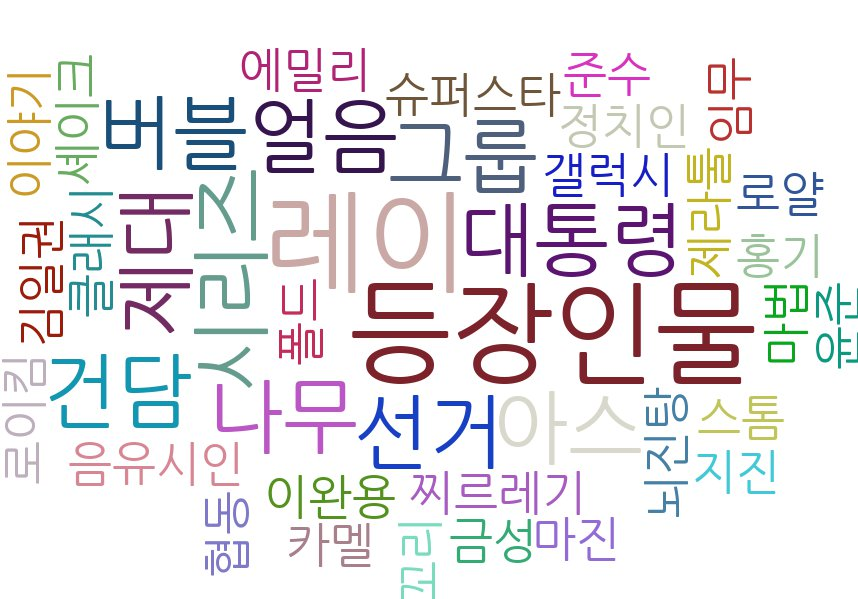

In [21]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'title_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='title_wordcloud.jpg')

-----

##### 카테고리 키워드

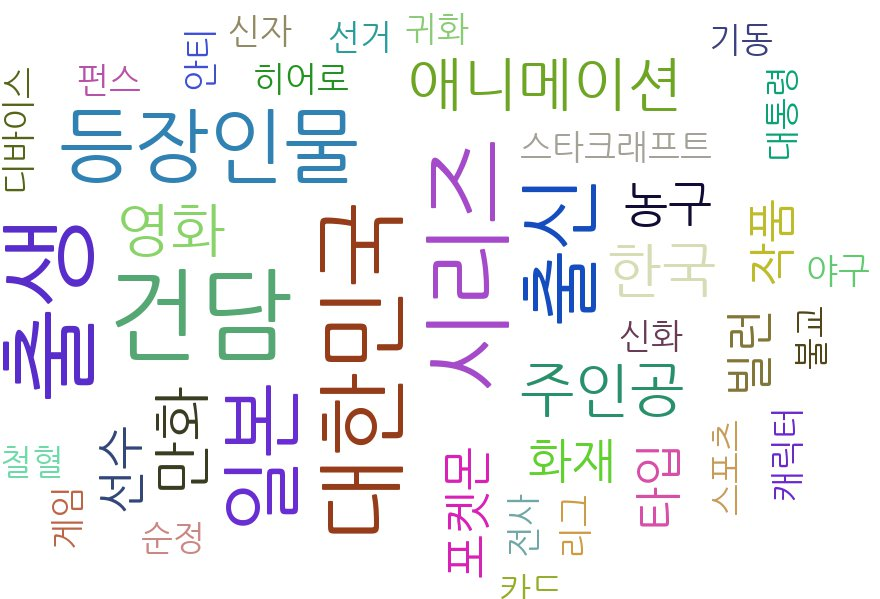

In [22]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'category_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='category_wordcloud.jpg')